In [23]:
import pandas as pd

# Cargar el dataframe limpio desde el archivo pickle
df = pd.read_pickle('data_limpia.pkl')

# Ver las primeras filas para confirmar que se cargó correctamente
print(df.head())
print(f"Dimensiones del dataset: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")

    age  monthly_inhand_salary  num_bank_accounts  num_credit_card  \
0  23.0            1824.843333                3.0              4.0   
1  23.0            1426.204829                3.0              4.0   
2  40.8            2059.822083                3.0              4.0   
3  23.0            1661.386500                3.0              4.0   
4  23.0            1824.843333                3.0              4.0   

   interest_rate  delay_from_due_date  num_of_delayed_payment  \
0            3.0                    3                     7.0   
1            3.0                   -1                     7.6   
2            3.0                    3                     7.0   
3            3.0                    5                     4.0   
4            3.0                    6                     8.6   

   changed_credit_limit  num_credit_inquiries  outstanding_debt  ...  \
0                 11.27                   4.0            809.98  ...   
1                 11.27                   4.

## K-Nearest Neighbors (KNN) Classifier

🚀 INICIANDO KNN - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO KNN...

📈 EVALUANDO MODELO KNN...
📊 MÉTRICAS DEL MODELO KNN:
Accuracy : 0.7485
Precision (macro avg): 0.7251
Recall (macro avg): 0.7383
f1-Score (macro avg): 0.7311
CV Mean f1-score (macro avg): 0.7150
CV Std f1-score (macro avg): 0.0023

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.63      0.70      0.66      5349
        Poor       0.75      0.76      0.75      8699
    Standard       0.79      0.76      0.78     15952

    accuracy                           0.75     30000
   macro avg       0.73      0.74      0.73     30000
weighted avg       0.75      0.75      0.75     30000



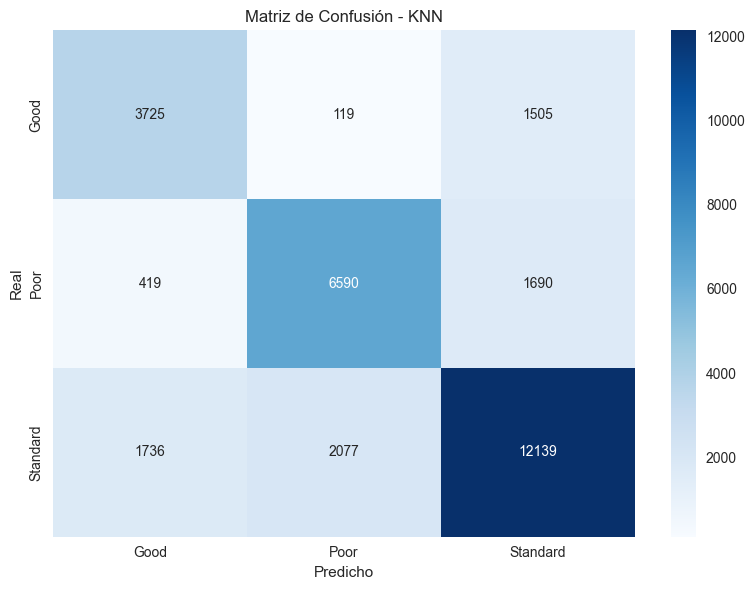


🎯 RESUMEN FINAL - KNN BENCHMARK
⏱️  Tiempo ejecución: 9.31s
📈 f1-score (macro avg): 0.7311 (73.11%)
🎯 Validación Cruzada: 0.7150 ± 0.0046
💾 Resultados guardados: 'knn_benchmark_results.pkl'


In [4]:
# =============================================================================
# KNN - MODELO BENCHMARK
# =============================================================================
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO KNN - MODELO BENCHMARK...")
start_time = time.time()

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO KNN...")

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    n_jobs=-1
)

knn_model.fit(X_train_processed, y_train_encoded)

# Predicciones
y_pred = knn_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO KNN...")

# Métricas principales
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Validación cruzada
cv_scores = cross_val_score(knn_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO KNN:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación detallado
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]  # Asumiendo 3 clases: 0, 1, 2
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# VISUALIZACIONES
# =============================================================================

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - KNN')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - KNN BENCHMARK")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'KNN',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'knn_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'knn_benchmark_results.pkl'")
print("="*60)

## Naive Bayes

🚀 INICIANDO NAIVE BAYES - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO 

📈 EVALUANDO MODELO BAYESIANO...
📊 MÉTRICAS DEL MODELO KNN:
Accuracy : 0.6363
Precision (macro avg): 0.6342
Recall (macro avg): 0.6926
f1-Score (macro avg): 0.6324
CV Mean f1-score (macro avg): 0.6330
CV Std f1-score (macro avg): 0.0054

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.46      0.84      0.59      5349
        Poor       0.61      0.71      0.66      8699
    Standard       0.83      0.53      0.65     15952

    accuracy                           0.64     30000
   macro avg       0.63      0.69      0.63     30000
weighted avg       0.70      0.64      0.64     30000



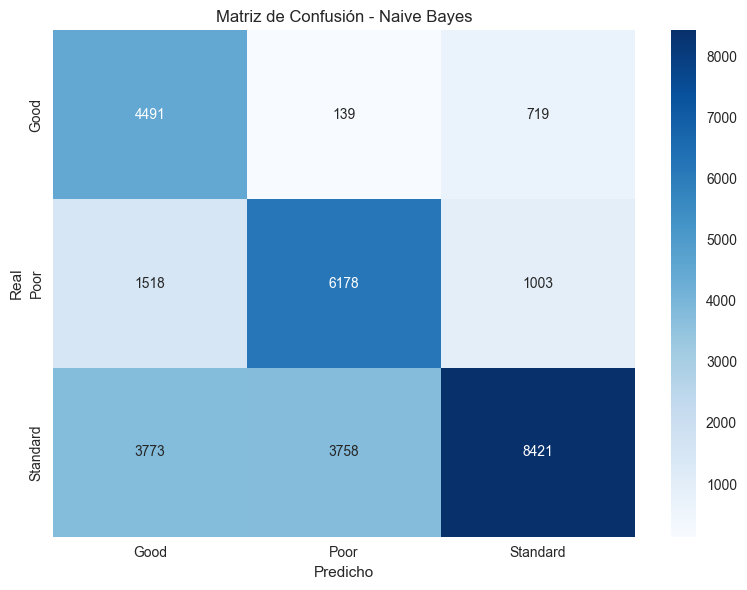


🎯 RESUMEN FINAL - NAIVE BAYES BENCHMARK
⏱️  Tiempo ejecución: 0.76s
📈 f1-score (macro avg): 0.6324 (63.24%)
🎯 Validación Cruzada: 0.6330 ± 0.0108
💾 Resultados guardados: 'bayes_benchmark_results.pkl'


In [7]:
# =============================================================================
# Naive Bayes - MODELO BENCHMARK
# =============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO NAIVE BAYES - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO 
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO ")

bayes_model=GaussianNB()
bayes_model.fit(X_train_processed,y_train_encoded)

# Predicciones
y_pred = bayes_model.predict(X_test_processed)


# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO BAYESIANO...")

# Métricas principales
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Validación cruzada
cv_scores = cross_val_score(bayes_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO KNN:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación detallado
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]  # Asumiendo 3 clases: 0, 1, 2
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]

# =============================================================================
# VISUALIZACIONES 
# =============================================================================

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Naive Bayes')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time


print("\n" + "="*60)
print("🎯 RESUMEN FINAL - NAIVE BAYES BENCHMARK")
print("="*60)
print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")

print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'Naive_Bayes',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'bayes_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'bayes_benchmark_results.pkl'")
print("="*60)

##  Regresión Logística (con regularización L1 y L2)

🚀 INICIANDO REGRESIÓN LOGÍSTICA - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO REGRESIÓN LOGÍSTICA...

📈 EVALUANDO MODELO REGRESIÓN LOGÍSTICA...
📊 MÉTRICAS DEL MODELO REGRESIÓN LOGÍSTICA:
Accuracy : 0.6492
Precision (macro avg): 0.6293
Recall (macro avg): 0.6134
f1-Score (macro avg): 0.6186
CV Mean f1-score (macro avg): 0.6207
CV Std f1-score (macro avg): 0.0032

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.55      0.57      0.56      5349
        Poor       0.66      0.53      0.59      8699
    Standard       0.68      0.74      0.71     15952

    accuracy                           0.65     30000
   macro avg       0.63      0.61      0.62     30000
weighted avg       0.65      0.65      0.65     30000


🔍 ANÁLISIS DE COEFICIENTES:
Top 10 características más importantes por clase:

📊 Clase 'Good':
                                              Feature  Coefficient
38   payment_behaviour

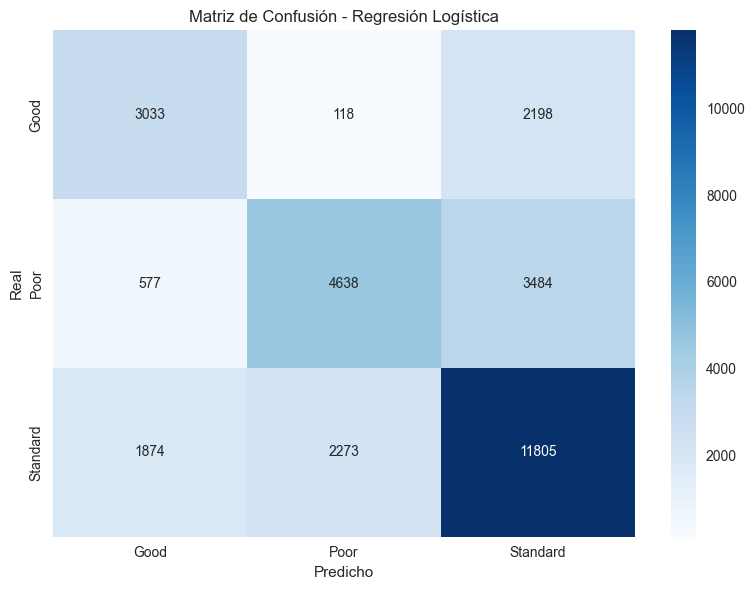


🎯 RESUMEN FINAL - REGRESIÓN LOGÍSTICA
⏱️  Tiempo ejecución: 12.41s
📈 f1-score (macro): 0.6186 (61.86%)
🎯 Validación Cruzada: 0.6207 ± 0.0063
🔝 Característica más importante: payment_behaviour_Low_spent_Small_value_payments
💾 Resultados guardados: 'logreg_benchmark_results.pkl'


In [ ]:
# REGRESIÓN LOGÍSTICA - MODELO BENCHMARK

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

print("🚀 INICIANDO REGRESIÓN LOGÍSTICA - MODELO BENCHMARK...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO REGRESIÓN LOGÍSTICA...")

lr_model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)

lr_model.fit(X_train_processed, y_train_encoded)

# Predicciones
y_pred = lr_model.predict(X_test_processed)
y_pred_proba = lr_model.predict_proba(X_test_processed)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO REGRESIÓN LOGÍSTICA...")

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

cv_scores = cross_val_score(lr_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO REGRESIÓN LOGÍSTICA:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# ANÁLISIS DE COEFICIENTES
# =============================================================================

print(f"\n🔍 ANÁLISIS DE COEFICIENTES:")

# Obtener nombres de características del preprocesador

binary_cols= ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan'
            ,'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))+
                binary_cols)

coefficients = lr_model.coef_

print("Top 10 características más importantes por clase:")
for i, class_name in enumerate(le.classes_):
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients[i]
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print(f"\n📊 Clase '{class_name}':")
    print(coef_df.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(8, 6))

# Matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - REGRESIÓN LOGÍSTICA")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

# Característica más importante
best_coefs = lr_model.coef_[0]
top_feature_idx = np.argmax(np.abs(best_coefs))
print(f"🔝 Característica más importante: {feature_names[top_feature_idx]}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'LogisticRegression',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'coefficients': lr_model.coef_,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'logreg_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'logreg_benchmark_results.pkl'")
print("="*60)

## Ridge

🚀 INICIANDO RIDGE CLASSIFICATION - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO RIDGE...

📈 EVALUANDO MODELO RIDGE...
📊 MÉTRICAS DEL MODELO RIDGE:
Accuracy : 0.6404
Precision (macro avg): 0.6150
Recall (macro avg): 0.6224
f1-Score (macro avg): 0.6140
CV Mean f1-score (macro avg): 0.6132
CV Std f1-score (macro avg): 0.0020

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.49      0.63      0.55      5349
        Poor       0.65      0.54      0.59      8699
    Standard       0.70      0.70      0.70     15952

    accuracy                           0.64     30000
   macro avg       0.61      0.62      0.61     30000
weighted avg       0.65      0.64      0.64     30000



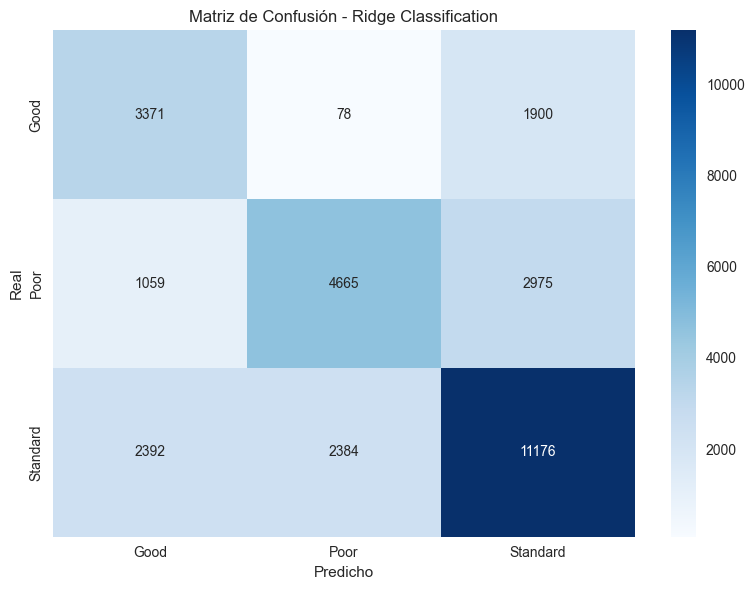


🎯 RESUMEN FINAL - RIDGE CLASSIFICATION
⏱️  Tiempo ejecución: 0.69s
📈 f1-score (macro avg): 0.6140 (61.40%)
🎯 Validación Cruzada: 0.6132 ± 0.0040
💾 Resultados guardados: 'ridge_benchmark_results.pkl'


In [71]:
# =============================================================================
# RIDGE CLASSIFICATION - MODELO BENCHMARK
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

print("🚀 INICIANDO RIDGE CLASSIFICATION - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# CONFIGURACIÓN
# =============================================================================

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO RIDGE...")

ridge_model = RidgeClassifier(
    alpha=1.0,
    random_state=42,
    max_iter=1000
)

ridge_model.fit(X_train_processed, y_train_encoded)

# Predicciones
y_pred = ridge_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================

print("\n📈 EVALUANDO MODELO RIDGE...")

# Métricas principales
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Validación cruzada
cv_scores = cross_val_score(ridge_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO RIDGE:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]  # Asumiendo 3 clases: 0, 1, 2
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(8, 6))

# Matriz de confusión
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Ridge Classification')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - RIDGE CLASSIFICATION")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'RidgeClassifier',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'coefficients': ridge_model.coef_,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'ridge_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'ridge_benchmark_results.pkl'")
print("="*60)

## Lasso

In [ ]:
# =============================================================================

## Árbol de Decisión

🌳 INICIANDO ÁRBOL DE DECISIÓN - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO ÁRBOL DE DECISIÓN...

📈 EVALUANDO MODELO ÁRBOL DE DECISIÓN...
📊 MÉTRICAS DEL MODELO ÁRBOL DE DECISIÓN:
Accuracy : 0.6721
Precision (macro avg): 0.6570
Recall (macro avg): 0.6777
f1-Score (macro avg): 0.6556
CV Mean f1-score (macro avg): 0.6578
CV Std f1-score (macro avg): 0.0036

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.50      0.76      0.60      5349
        Poor       0.74      0.59      0.65      8699
    Standard       0.74      0.69      0.71     15952

    accuracy                           0.67     30000
   macro avg       0.66      0.68      0.66     30000
weighted avg       0.69      0.67      0.68     30000


🔍 IMPORTANCIA DE CARACTERÍSTICAS:
Top 10 características más importantes:
                      Feature  Importance
9            outstanding_debt      0.4152
31        credit_mix_Standard     

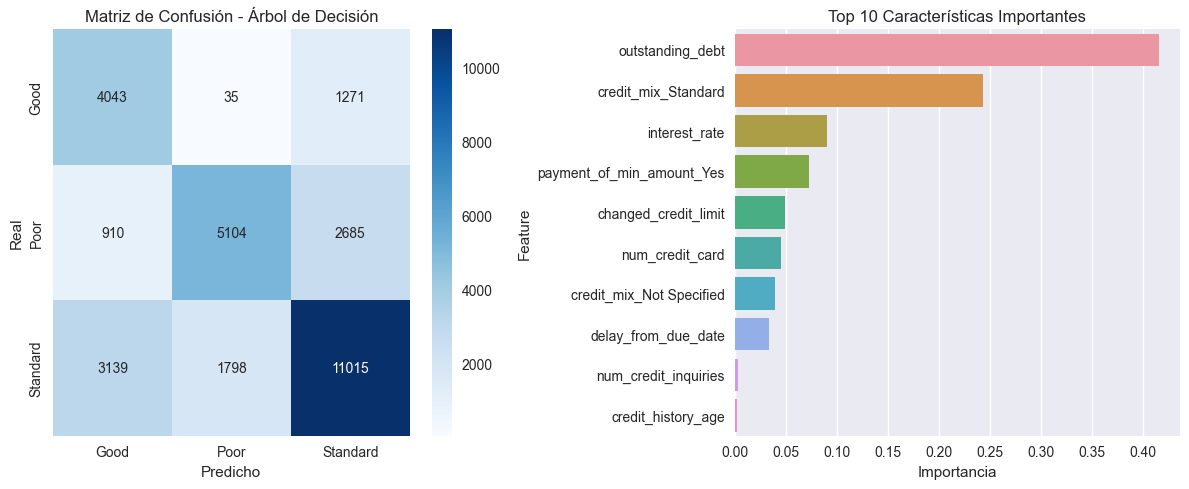


🎯 RESUMEN FINAL - ÁRBOL DE DECISIÓN
⏱️  Tiempo ejecución: 3.12s
📈 f1-score (macro avg): 0.6556 (65.56%)
🎯 Validación Cruzada: 0.6578 ± 0.0072
📊 Característica más importante: outstanding_debt
🌳 Profundidad del árbol: 5
🍃 Número de hojas: 32
💾 Resultados guardados: 'decision_tree_benchmark_results.pkl'


In [73]:
# ÁRBOL DE DECISIÓN - MODELO BENCHMARK

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd

print("🌳 INICIANDO ÁRBOL DE DECISIÓN - MODELO BENCHMARK...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO ÁRBOL DE DECISIÓN...")

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train_processed, y_train_encoded)

y_pred = dt_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO ÁRBOL DE DECISIÓN...")

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

cv_scores = cross_val_score(dt_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO ÁRBOL DE DECISIÓN:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")


# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 IMPORTANCIA DE CARACTERÍSTICAS:")

# Obtener nombres de características del preprocesador
binary_cols= ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan'
            ,'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))+
                binary_cols)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - ÁRBOL DE DECISIÓN")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")
print(f"🌳 Profundidad del árbol: {dt_model.get_depth()}")
print(f"🍃 Número de hojas: {dt_model.get_n_leaves()}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'DecisionTree',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance,
    'classification_report': class_report_df,
    'tree_depth': dt_model.get_depth(),
    'n_leaves': dt_model.get_n_leaves()
}

joblib.dump(benchmark_data, 'decision_tree_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'decision_tree_benchmark_results.pkl'")
print("="*60)

## Random Forest

🌲 INICIANDO RANDOM FOREST - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO RANDOM FOREST...

📈 EVALUANDO MODELO RANDOM FOREST...
📊 MÉTRICAS DEL MODELO RANDOM FOREST:
Accuracy : 0.7827
Precision (macro avg): 0.7685
Recall (macro avg): 0.7695
f1-Score (macro avg): 0.7690
CV Mean f1-score (macro avg): 0.7580
CV Std f1-score (macro avg): 0.0045

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.72      0.72      0.72      5349
        Poor       0.78      0.79      0.78      8699
    Standard       0.81      0.80      0.80     15952

    accuracy                           0.78     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.78      0.78      0.78     30000


🔍 ANALISIS DE IMPORTANCIA DE CARACTERÍSTICAS:
Top 10 características más importantes:
                     Feature  Importance
9           outstanding_debt      0.1048
4              interest_rate      0.0719

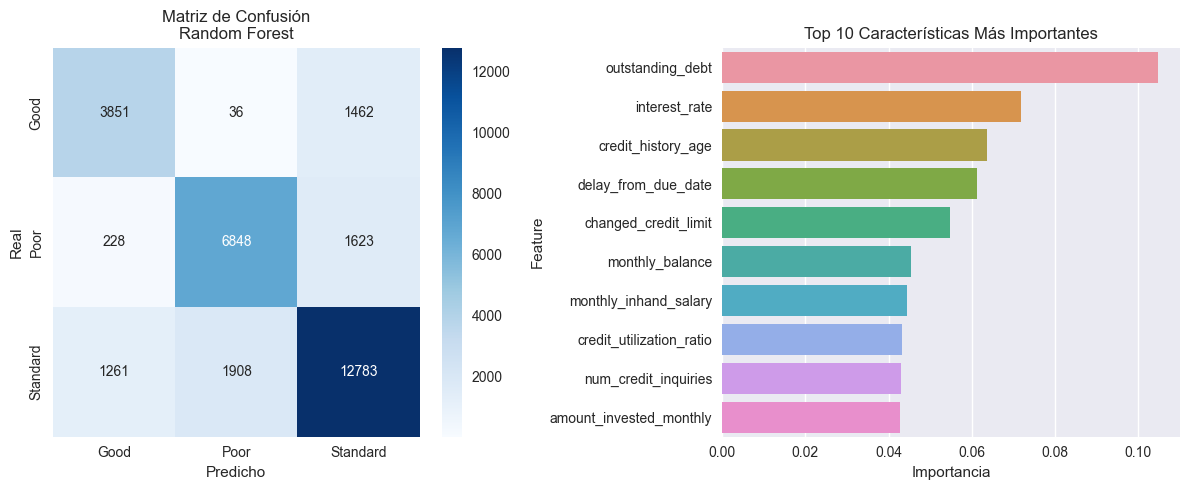


🎯 RESUMEN FINAL - RANDOM FOREST
⏱️  Tiempo ejecución: 21.27s
📈 f1-score (macro avg): 0.7690 (76.90%)
🎯 Validación Cruzada: 0.7580 ± 0.0090
📊 Característica más importante: outstanding_debt
💾 Resultados guardados: 'random_forest_benchmark_results.pkl'


In [74]:
# =============================================================================
# RANDOM FOREST - MODELO BENCHMARK
# =============================================================================

import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

print("🌲 INICIANDO RANDOM FOREST - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO RANDOM FOREST...")

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_processed, y_train_encoded)

y_pred = rf_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO RANDOM FOREST...")

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

cv_scores = cross_val_score(rf_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO RANDOM FOREST:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 ANALISIS DE IMPORTANCIA DE CARACTERÍSTICAS:")

# Obtener nombres de características del preprocesador
binary_cols= ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan'
            ,'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
feature_names = (list(numerical_cols) + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))+
                binary_cols)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión\nRandom Forest')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Más Importantes')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - RANDOM FOREST")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")

# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'RandomForest',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'random_forest_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'random_forest_benchmark_results.pkl'")
print("="*60)

## XGBoost (con interpretabilidad usando LIME)

In [ ]:
#!pip install xgboost lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 6.3 MB/s eta 0:00:20
    --------------------------------------- 2.4/124.9 MB 5.8 MB/s eta 0:00:21
   - -------------------------------------- 3.7/124.9 MB 5.9 MB/s eta 0:00:21
   - -------------------------------------- 5.0/124.9 MB 6.0 MB/s eta 0:00:20
   -- ------------------------------------- 6.6/124.9 MB 6.2 MB/s eta 0:00:20
   -- ------------------------------------- 7.9/124.9 MB 6.3 MB/s eta 0:00:19
   -- ------------------------------------- 9.2/124.9 MB 6.3 MB/s eta 0:00:19
   --- ------------------------------------ 10.7/124.9 MB 6.5 MB/s eta 0:00:18
   --- ------------------------------------ 12.3/124.9 MB 6.5 MB/s eta 0:00:18
   ---- ----------------------------------- 13.9/124.9 MB 6.6 MB/s eta 0:00:17
   ---- ----------------------------------- 

  DEPRECATION: Building 'lime' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'lime'. Discussion can be found at https://github.com/pypa/pip/issues/6334


🚀 INICIANDO XGBOOST - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO XGBOOST...

📈 EVALUANDO MODELO XGBOOST...
📊 MÉTRICAS DEL MODELO XGBOOST:
Accuracy : 0.7515
Precision (macro avg): 0.7340
Recall (macro avg): 0.7350
f1-Score (macro avg): 0.7344
CV Mean f1-score (macro avg): 0.7304
CV Std f1-score (macro avg): 0.0041

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.67      0.69      0.68      5349
        Poor       0.75      0.73      0.74      8699
    Standard       0.78      0.78      0.78     15952

    accuracy                           0.75     30000
   macro avg       0.73      0.74      0.73     30000
weighted avg       0.75      0.75      0.75     30000


🔍 IMPORTANCIA DE CARACTERÍSTICAS:
Top 10 características más importantes:
                     Feature  Importance
29       delay_from_due_date      0.3934
31      changed_credit_limit      0.1378
30    num_of_delayed_payment      0

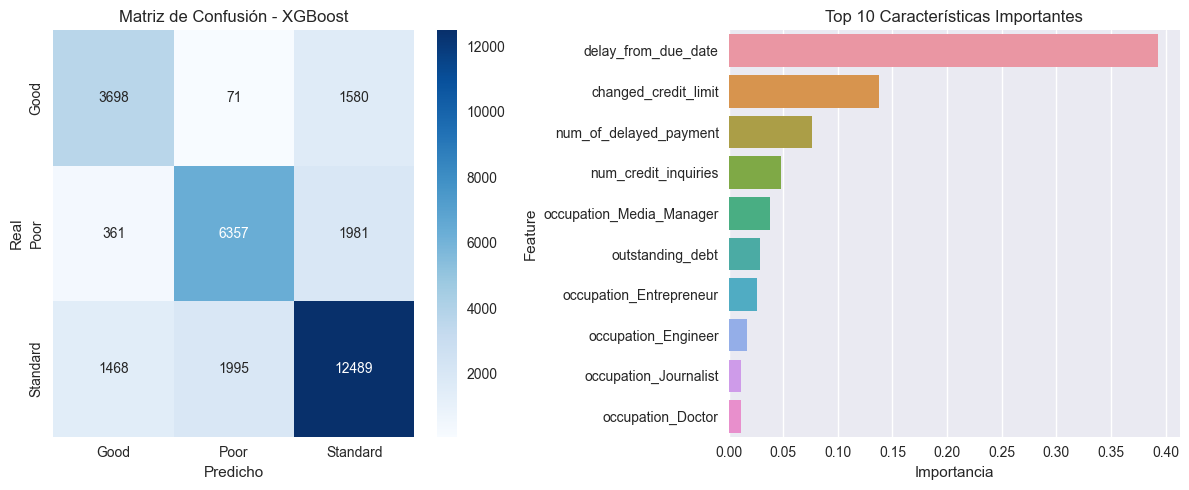


🔍 INTERPRETABILIDAD CON LIME...
Inicializando explicador LIME...
Generando explicaciones para 3 muestras del conjunto de prueba...

--- Explicación para muestra 1 ---
Clase real: Standard
Clase predicha: Standard



--- Explicación para muestra 2 ---
Clase real: Good
Clase predicha: Good



--- Explicación para muestra 3 ---
Clase real: Good
Clase predicha: Good



🎯 RESUMEN FINAL - XGBOOST
⏱️  Tiempo ejecución: 6.08s
📈 f1-score (macro): 0.7344 (73.44%)
🎯 Validación Cruzada: 0.7304 ± 0.0083
📊 Característica más importante: delay_from_due_date
💾 Resultados guardados: 'xgboost_benchmark_results.pkl'


In [78]:
# XGBOOST - MODELO BENCHMARK

import warnings
warnings.filterwarnings('ignore')
import sys
import subprocess

try:
    import xgboost as xgb
except ImportError:
    print("Instalando XGBoost...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "xgboost"])
    import xgboost as xgb

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import numpy as np
import pandas as pd
import lime

print("🚀 INICIANDO XGBOOST - MODELO BENCHMARK...")
start_time = time.time()

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO XGBOOST...")

xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_processed, y_train_encoded)

y_pred = xgb_model.predict(X_test_processed)

# =============================================================================
# EVALUACIÓN
# =============================================================================

print("\n📈 EVALUANDO MODELO XGBOOST...")

accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

cv_scores = cross_val_score(xgb_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO XGBOOST:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]
)

class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]

# =============================================================================
# ANÁLISIS DE CARACTERÍSTICAS
# =============================================================================

print(f"\n🔍 IMPORTANCIA DE CARACTERÍSTICAS:")

binary_cols= ['not_specified','credit_builder_loan','personal_loan','debt_consolidation_loan'
            ,'student_loan', 'payday_loan','mortgage_loan','auto_loan','home_equity_loan']
feature_names = (
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
    + list(numerical_cols)
    + binary_cols
)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 características más importantes:")
print(feature_importance.head(10).round(4))

# =============================================================================
# VISUALIZACIONES
# =============================================================================

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - XGBoost')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.subplot(1, 2, 2)
top_features = feature_importance.head(10)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Características Importantes')
plt.xlabel('Importancia')

plt.tight_layout()
plt.show()

print("\n🔍 INTERPRETABILIDAD CON LIME...")

try:
    from lime import lime_tabular
    
    print("Inicializando explicador LIME...")

    feature_names = (
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
    + list(numerical_cols)
    + binary_cols
    )

    X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
    X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

    explainer = lime_tabular.LimeTabularExplainer(
        X_train_df.values,
        feature_names=feature_names,
        class_names=le.classes_.tolist(),
        mode='classification',
        random_state=42
    )

    print("Generando explicaciones para 3 muestras del conjunto de prueba...")

    for i in range(min(3, len(X_test_df))):
        print(f"\n--- Explicación para muestra {i+1} ---")
        exp = explainer.explain_instance(
            X_test_df.values[i],
            xgb_model.predict_proba,
            num_features=10
        )
        print(f"Clase real: {le.inverse_transform([y_test_encoded[i]])[0]}")
        print(f"Clase predicha: {le.inverse_transform([y_pred[i]])[0]}")
        
        exp.show_in_notebook(show_table=True)

except Exception as e:
    print(f"⚠️ Error con LIME: {e}")

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time

print("\n" + "="*60)
print("🎯 RESUMEN FINAL - XGBOOST")
print("="*60)

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")
print(f"📊 Característica más importante: {feature_importance.iloc[0]['Feature']}")

benchmark_data = {
    'model': 'XGBoost',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'feature_importance': feature_importance,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'xgboost_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'xgboost_benchmark_results.pkl'")
print("="*60)


## Máquina de Soporte Vectorial

🚀 INICIANDO MAQUÍNA DE SOPORTE VECTORIAL - MODELO BENCHMARK...
✅ Datos preparados: 70000 train, 30000 test

🎯 ENTRENANDO MODELO 

📈 EVALUANDO MODELO SVM...
📊 MÉTRICAS DEL MODELO SVM:
Accuracy : 0.7122
Precision (macro avg): 0.6903
Recall (macro avg): 0.6928
f1-Score (macro avg): 0.6897
CV Mean f1-score (macro avg): 0.6869
CV Std f1-score (macro avg): 0.0038

📋 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

        Good       0.58      0.66      0.62      5349
        Poor       0.74      0.65      0.69      8699
    Standard       0.75      0.76      0.75     15952

    accuracy                           0.71     30000
   macro avg       0.69      0.69      0.69     30000
weighted avg       0.72      0.71      0.71     30000



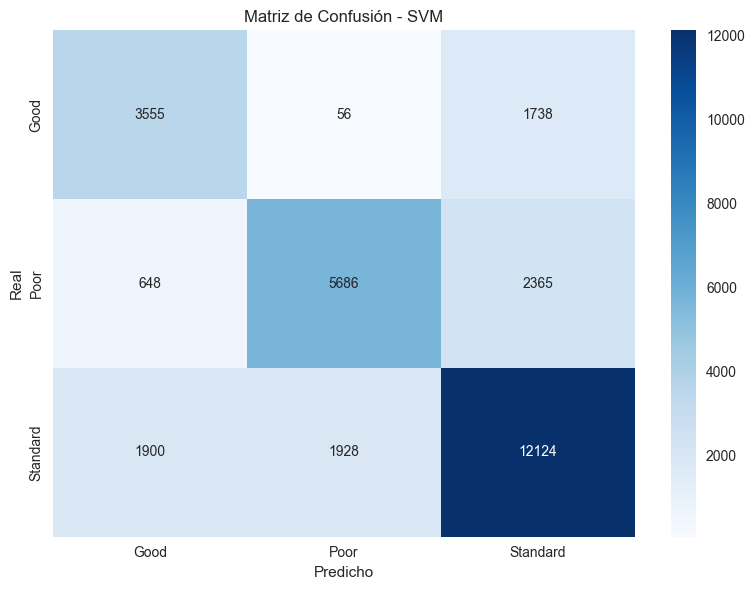


🎯 RESUMEN FINAL - MÁQUINA DE VECTORES DE SOPORTE BENCHMARK
⏱️  Tiempo ejecución: 1641.74s
⏱️  Tiempo ejecución: 1641.74s
📈 f1-score (macro avg): 0.6897 (68.97%)
🎯 Validación Cruzada: 0.6869 ± 0.0076
💾 Resultados guardados: 'svm_benchmark_results.pkl'


In [6]:
# =============================================================================
# MÁQUINA DE SOPORTE VECTORIAL - MODELO BENCHMARK
# =============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 INICIANDO MAQUÍNA DE SOPORTE VECTORIAL - MODELO BENCHMARK...")
start_time = time.time()

# =============================================================================
# PREPROCESAMIENTO
# =============================================================================

# Cargar datos
df = pd.read_pickle('data_limpia.pkl')

# Separar características y target
X = df.drop('credit_score', axis=1)
y = df['credit_score']

# Split de datos ANTES de la codificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Seleccionamos las variables numericas a estandarizar
numerical_cols=['age', 'monthly_inhand_salary',
          'num_bank_accounts', 'num_credit_card', 'interest_rate',
          'delay_from_due_date', 'num_of_delayed_payment','changed_credit_limit',
          'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
          'credit_history_age','total_emi_per_month', 'amount_invested_monthly',
          'monthly_balance']

# Seleccionamos las variables categóricas a codificar
categorical_cols=['occupation', 'credit_mix', 'payment_of_min_amount','payment_behaviour']
# Se no se toman las variables binarias ya que estas ya pueden considerarse
# como codificadas

# Crear el preprocesador con OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar transformaciones
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Codificar target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print(f"✅ Datos preparados: {X_train_processed.shape[0]} train, {X_test_processed.shape[0]} test")

# =============================================================================
# ENTRENAMIENTO DEL MODELO 
# =============================================================================

print(f"\n🎯 ENTRENANDO MODELO ")

svm_model=SVC()
svm_model.fit(X_train_processed,y_train_encoded)

# Predicciones
y_pred = svm_model.predict(X_test_processed)


# =============================================================================
# EVALUACIÓN COMPLETA
# =============================================================================
print("\n📈 EVALUANDO MODELO SVM...")
# Métricas principales
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='macro')
recall = recall_score(y_test_encoded, y_pred, average='macro')
f1 = f1_score(y_test_encoded, y_pred, average='macro')

# Validación cruzada
cv_scores = cross_val_score(svm_model, X_train_processed, y_train_encoded, cv=5, scoring='f1_macro')

print(f"📊 MÉTRICAS DEL MODELO SVM:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"f1-Score (macro avg): {f1:.4f}")
print(f"CV Mean f1-score (macro avg): {cv_scores.mean():.4f}")
print(f"CV Std f1-score (macro avg): {cv_scores.std():.4f}")

# Reporte de clasificación detallado
print("\n📋 REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))


# =============================================================================
# TABLA DE MÉTRICAS POR CLASE
# =============================================================================

from sklearn.metrics import precision_recall_fscore_support

# Calcular métricas por clase
precision_per_class, recall_per_class, f1_per_class, support_per_class = precision_recall_fscore_support(
    y_test_encoded, y_pred, labels=[0, 1, 2]  # Asumiendo 3 clases: 0, 1, 2
)

# Crear tabla de métricas por clase
class_report_df = pd.DataFrame({
    'precision': precision_per_class,
    'recall': recall_per_class,
    'f1-score': f1_per_class,
    'support': support_per_class
}, index=le.classes_)

# Calcular promedios
macro_avg = class_report_df[['precision', 'recall', 'f1-score']].mean()
weighted_avg = np.average(class_report_df[['precision', 'recall', 'f1-score']], 
                         weights=class_report_df['support'], axis=0)

# Agregar filas de promedios
class_report_df.loc['macro avg'] = [macro_avg['precision'], macro_avg['recall'], macro_avg['f1-score'], class_report_df['support'].sum()]
class_report_df.loc['weighted avg'] = [weighted_avg[0], weighted_avg[1], weighted_avg[2], class_report_df['support'][3]]
class_report_df.loc['accuracy'] = [accuracy, '', '', class_report_df['support'][3]]


# =============================================================================
# VISUALIZACIONES 
# =============================================================================

# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión - SVM')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

end_time = time.time()
execution_time = end_time - start_time


print("\n" + "="*60)
print("🎯 RESUMEN FINAL - MÁQUINA DE VECTORES DE SOPORTE BENCHMARK")
print("="*60)
print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")

print(f"⏱️  Tiempo ejecución: {execution_time:.2f}s")
print(f"📈 f1-score (macro avg): {f1:.4f} ({f1*100:.2f}%)")
print(f"🎯 Validación Cruzada: {cv_scores.mean():.4f} ± {cv_scores.std()*2:.4f}")


# Guardar modelo para benchmark comparativo
benchmark_data = {
    'model': 'SVM',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'cv_mean': cv_scores.mean(),
    'cv_std': cv_scores.std(),
    'execution_time': execution_time,
    'classification_report': class_report_df
}

joblib.dump(benchmark_data, 'svm_benchmark_results.pkl')
print(f"💾 Resultados guardados: 'svm_benchmark_results.pkl'")
print("="*60)


